# BATCH_DS2310_PHASE1_EVALUATION_PROJECT

## Importing Libraries and DATA

In [1]:
#Importing the required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the Dataset
url = "https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv"
data = pd.read_csv(url)

In [3]:
#displaying first five rows of the data set 
data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [4]:
#displaying last five rows of the data set 
data.tail()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


## Exploratory Data Analysis

In [5]:
#displaying shape of the dataset
data.shape

(30, 17)

In [6]:
#displaying the name of the columns
data.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

### Data Types

In [7]:
data.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [8]:
#info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


### Duplicate Values

In [9]:
#checking if it containany duplicate value
data.duplicated().any()

False

### Null Values

In [10]:
data.isnull().any()

W      False
R      False
AB     False
H      False
2B     False
3B     False
HR     False
BB     False
SO     False
SB     False
RA     False
ER     False
ERA    False
CG     False
SHO    False
SV     False
E      False
dtype: bool

In [11]:
data.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

### Statistical Measure

In [12]:
#statistical summary
data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


### Visualizing the distribution of the target

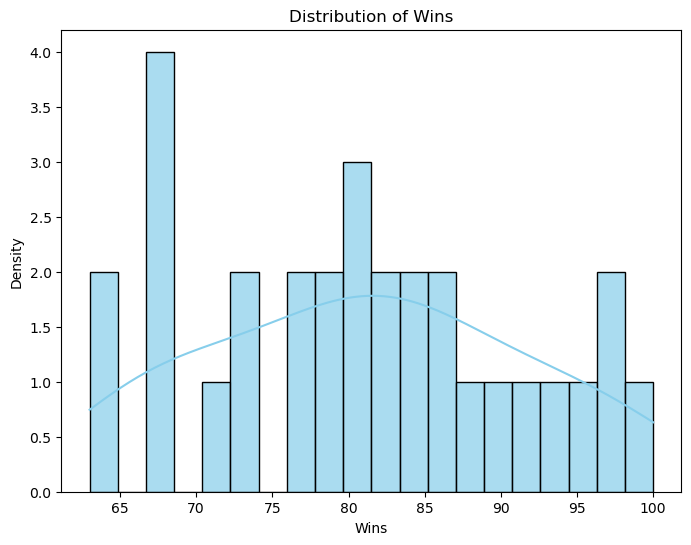

In [13]:
# hist plot
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.histplot(data['W'], bins=20, kde=True, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Wins')
plt.xlabel('Wins')
plt.ylabel('Density')
plt.show()

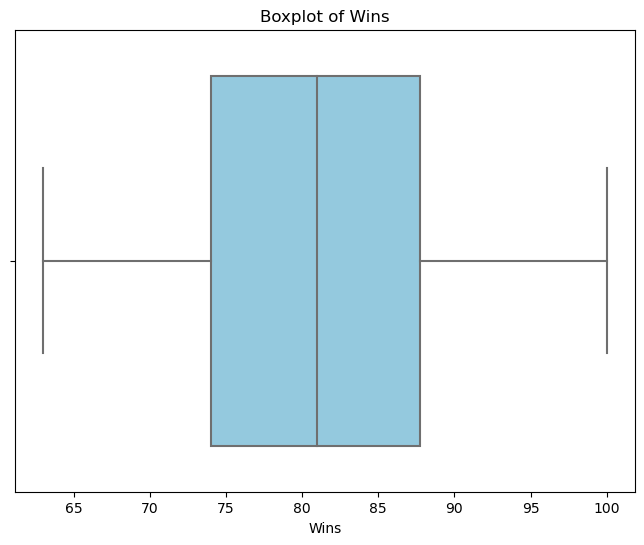

In [14]:
# box plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x=data['W'], color='skyblue')
plt.title('Boxplot of Wins')
plt.xlabel('Wins')
plt.show()

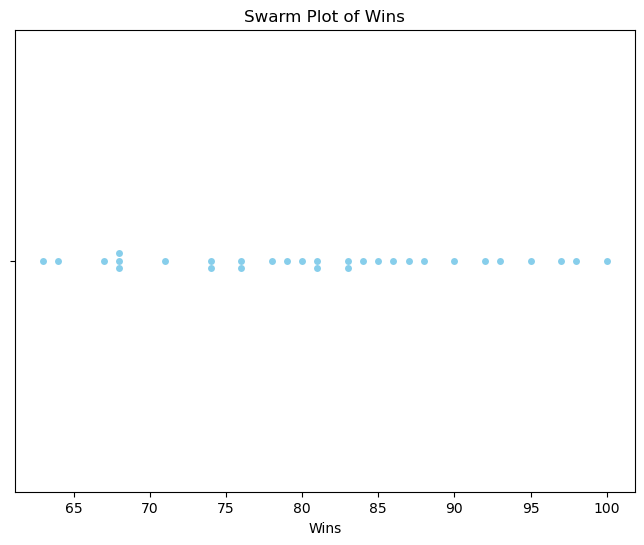

In [15]:
# Swarm Plot
plt.figure(figsize=(8, 6))
sns.swarmplot(x=data['W'], color='skyblue')
plt.title('Swarm Plot of Wins')
plt.xlabel('Wins')
plt.show()

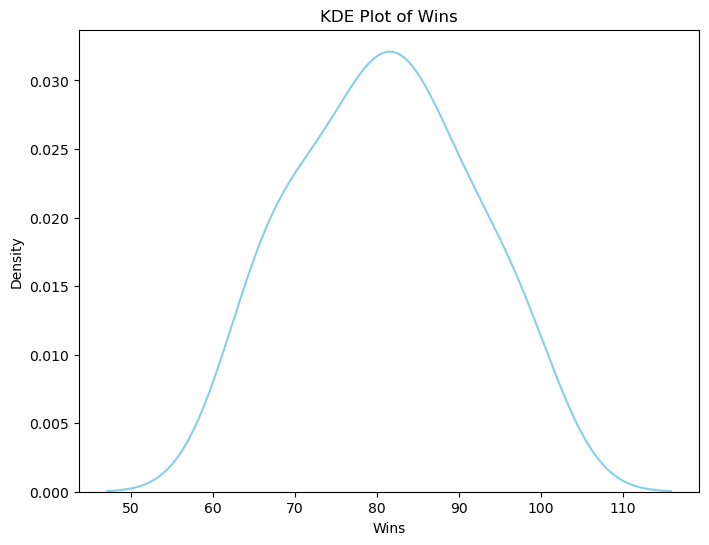

In [16]:
# kernel plot
plt.figure(figsize=(8, 6))
sns.kdeplot(data['W'], color='skyblue')
plt.title('KDE Plot of Wins')
plt.xlabel('Wins')
plt.ylabel('Density')
plt.show()

### Visualising the features Distribution

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt


features = ['R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'ERA', 'CG', 'SHO', 'SV', 'E']


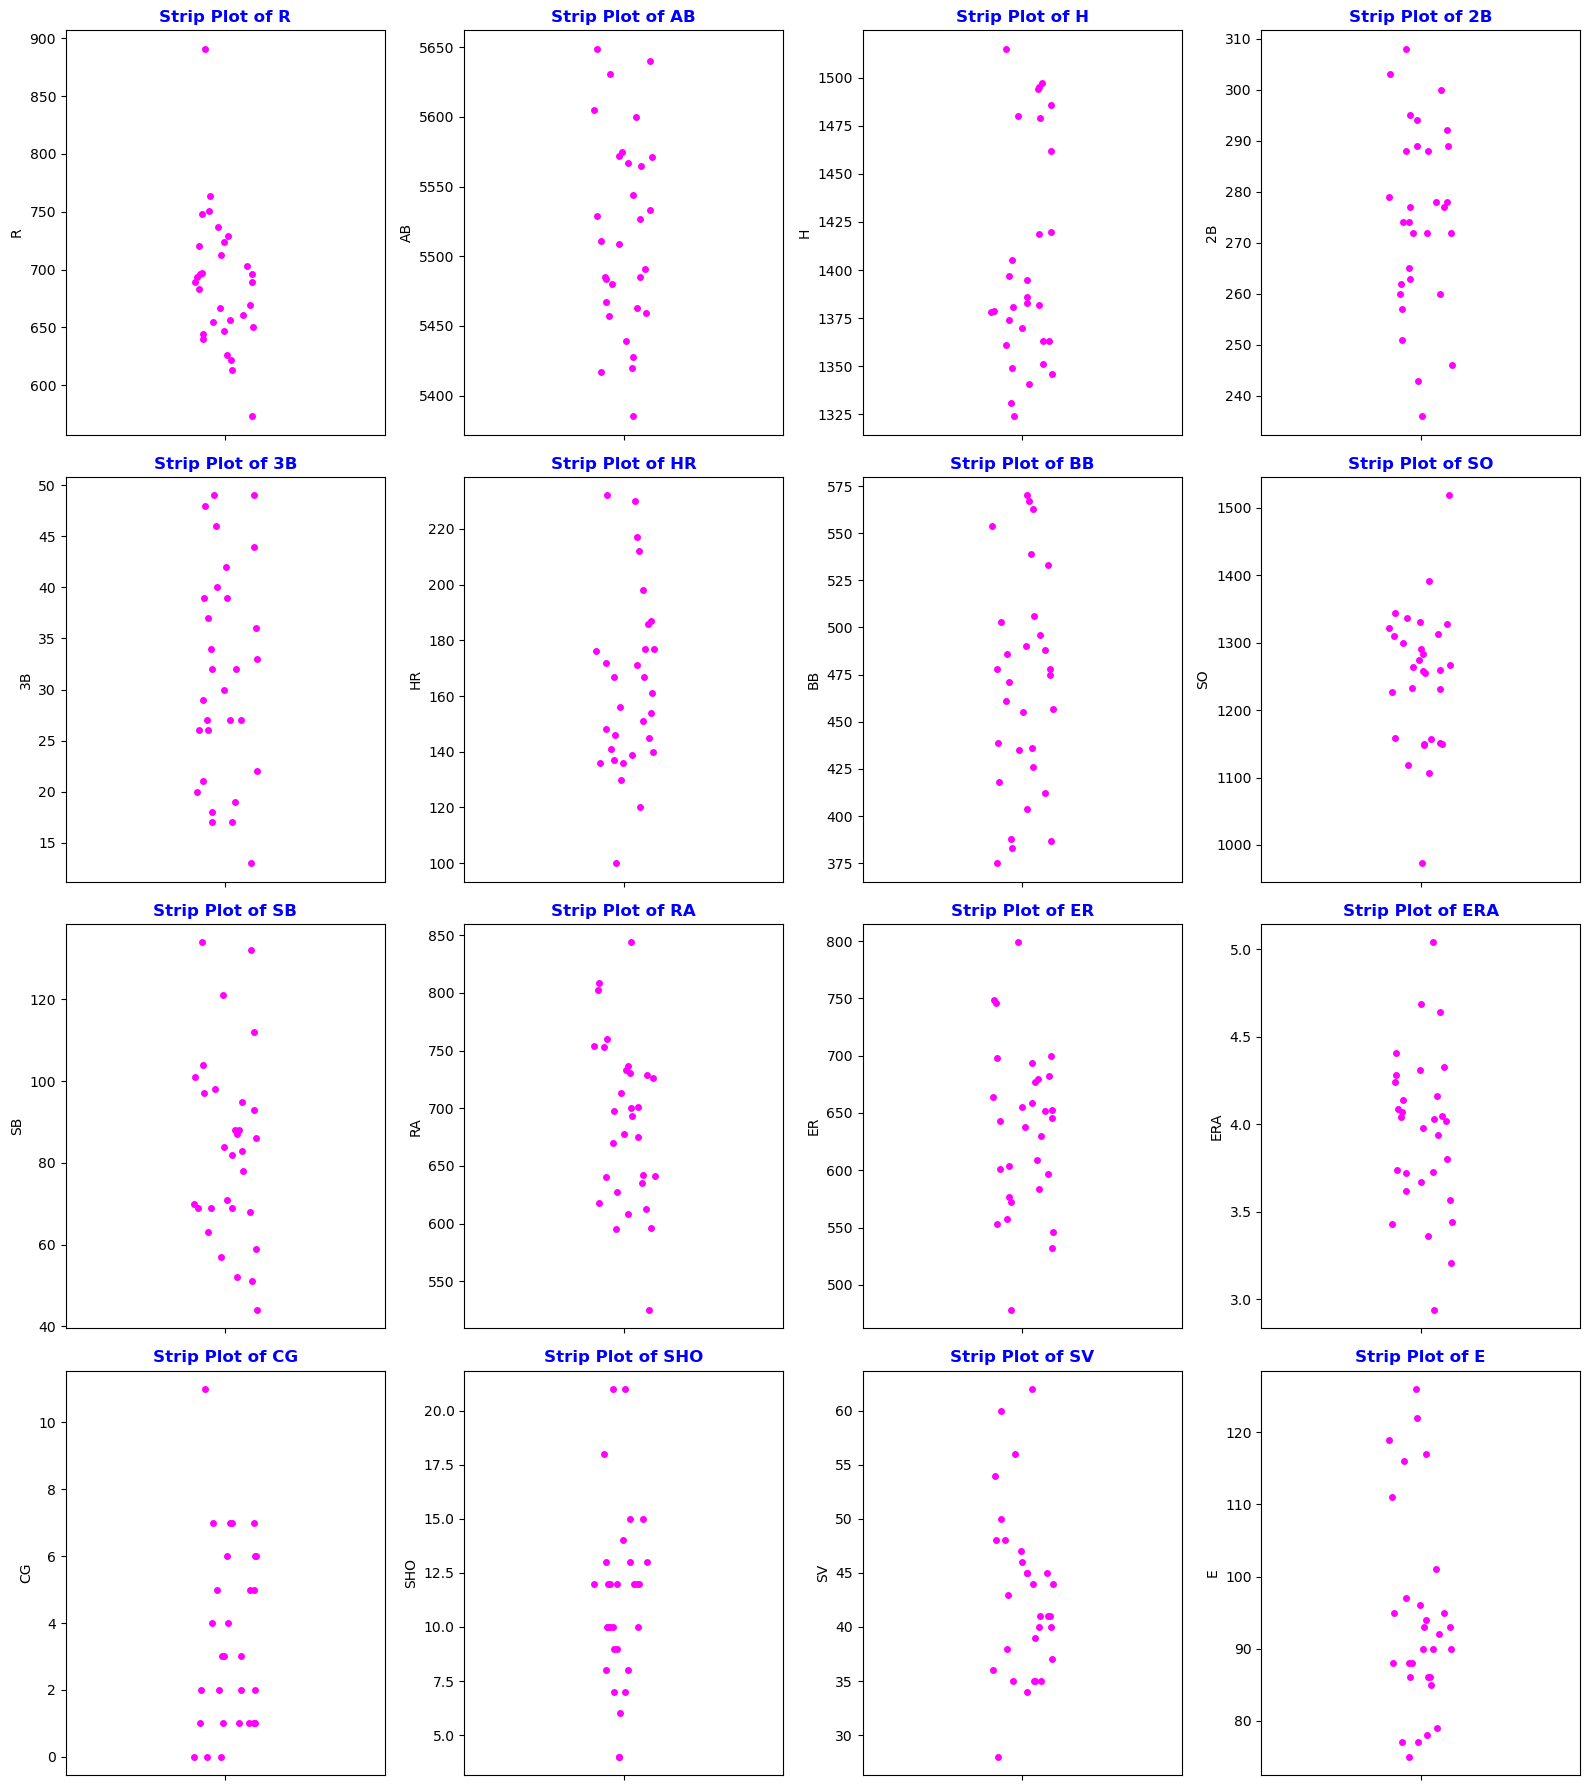

In [18]:
# Strip plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 18))
for i, feature in enumerate(features):
    plt.subplot(4, 4, i+1)
    sns.stripplot(data=data[feature], color='magenta')  # Change the color to orange
    plt.title(f'Strip Plot of {feature}', fontweight='bold', color='blue')  # Make title bold and blue
plt.tight_layout()
plt.show()

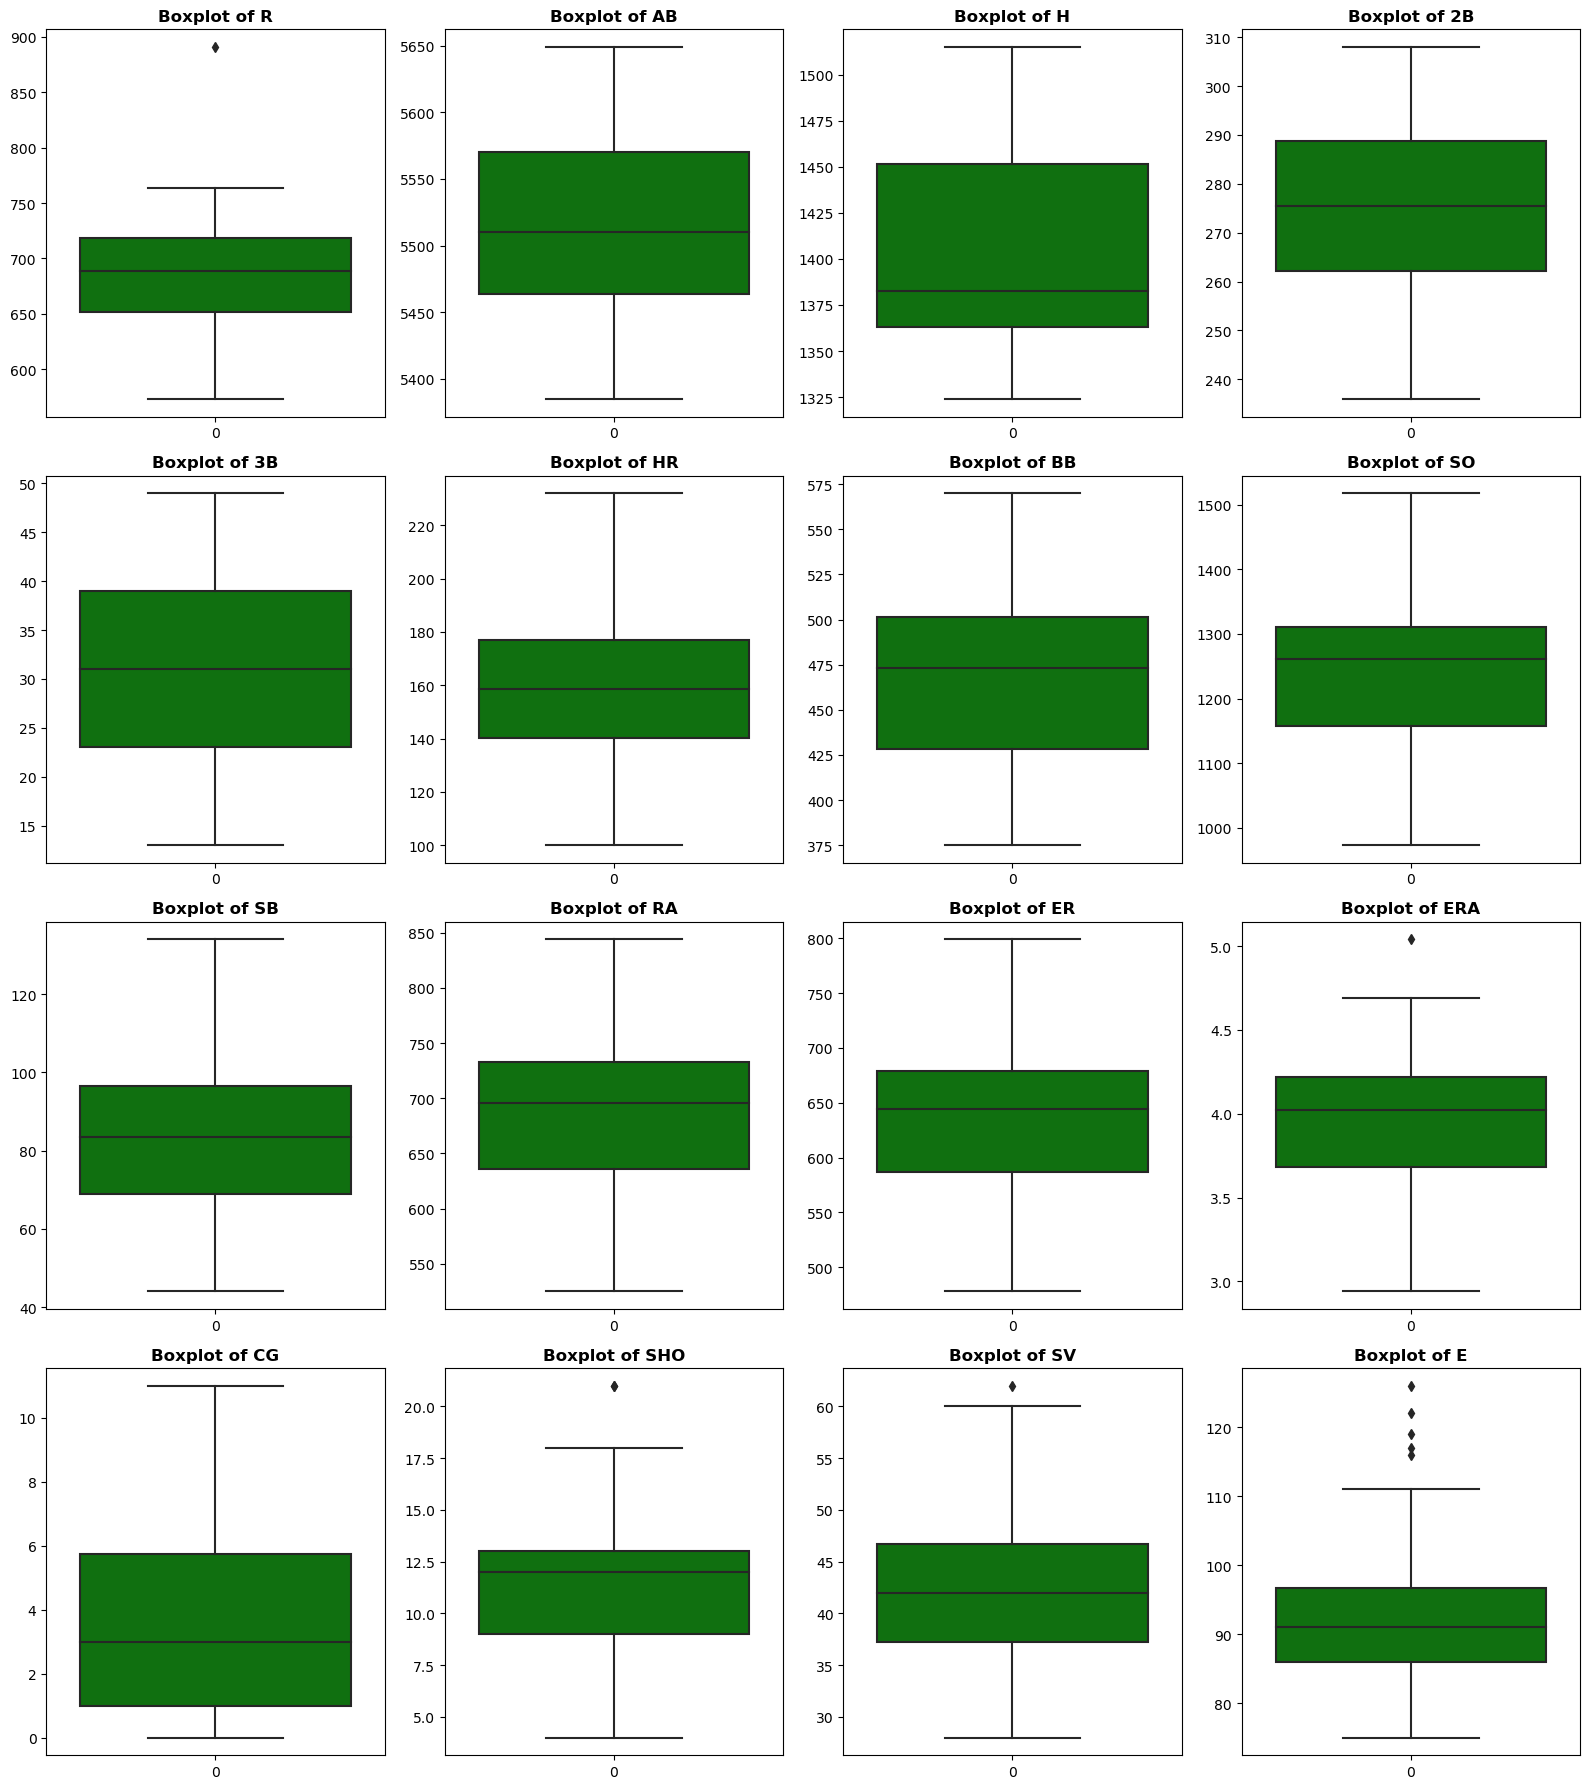

In [19]:
#Box plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 18))
for i, feature in enumerate(features):
    plt.subplot(4, 4, i+1)
    sns.boxplot(data=data[feature], color='green')  # Change the color to salmon
    plt.title(f'Boxplot of {feature}', fontweight='bold', color='black')  # Make title bold and navy
plt.tight_layout()
plt.show()

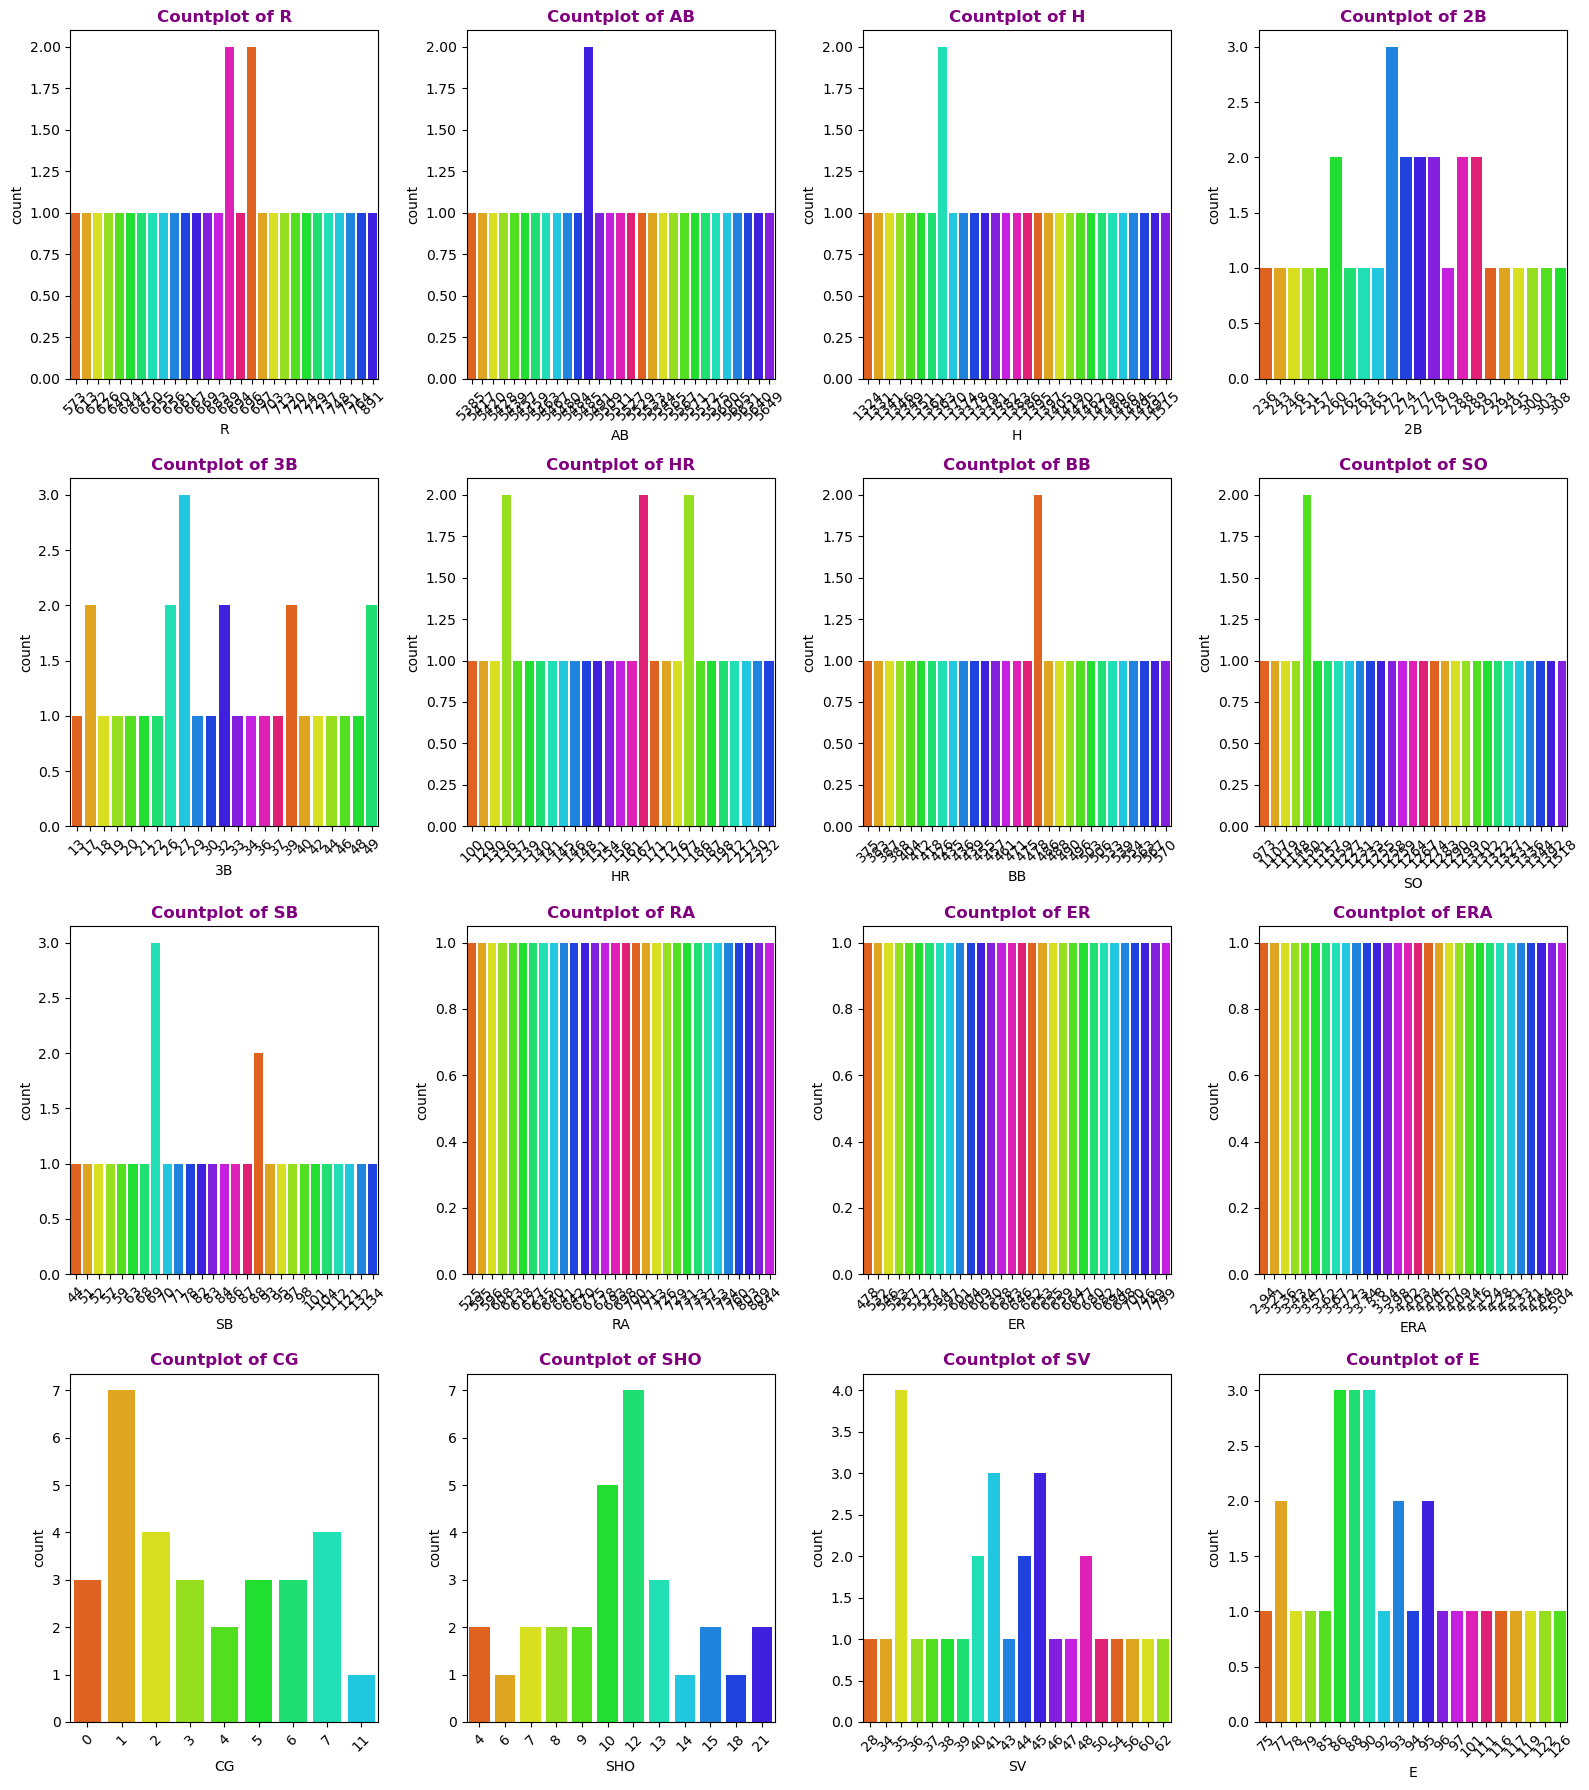

In [21]:
#Count plot
import seaborn as sns
import matplotlib.pyplot as plt
rainbow_palette = sns.color_palette('hsv', len(features))

plt.figure(figsize=(16, 18))
for i, feature in enumerate(features):
    plt.subplot(4, 4, i+1)
    sns.countplot(data=data, x=feature, palette=rainbow_palette)
    plt.xticks(rotation=45)
    plt.title(f'Countplot of {feature}', fontweight='bold', color='purple')  
plt.tight_layout()
plt.show()

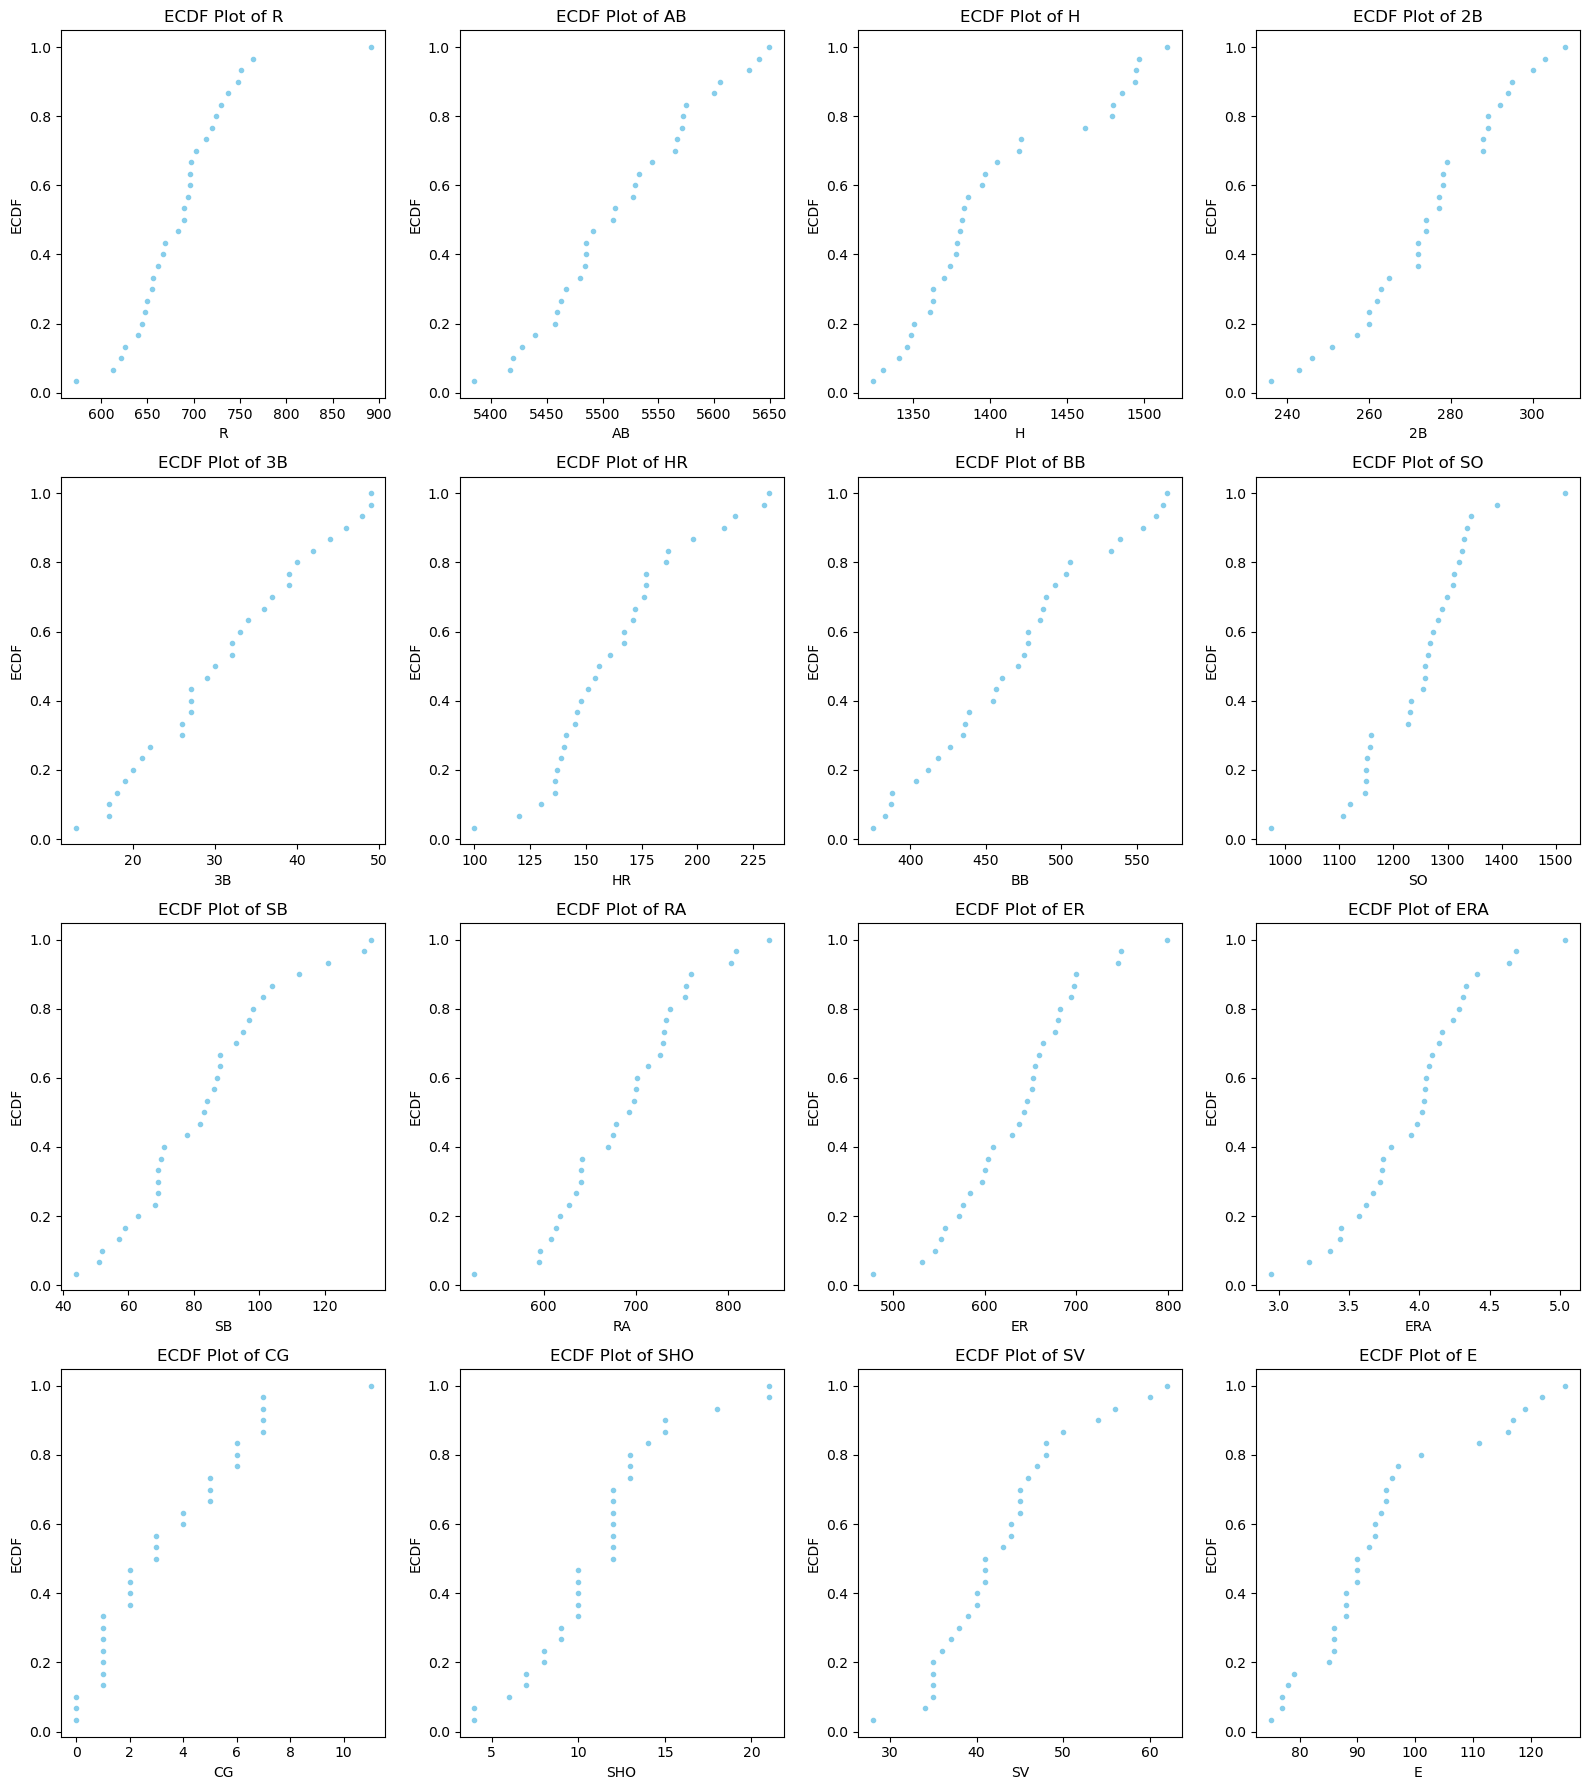

In [22]:
# EDCF 
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 18))


num_bins = 100

for i, feature in enumerate(features):
    plt.subplot(4, 4, i+1)
    
    
    sorted_data = np.sort(data[feature])
    ecdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    
  
    plt.plot(sorted_data, ecdf, marker='.', linestyle='none', color='skyblue')
    
    
    plt.title(f'ECDF Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('ECDF')

plt.tight_layout()
plt.show()


C:\Users\Debanjan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


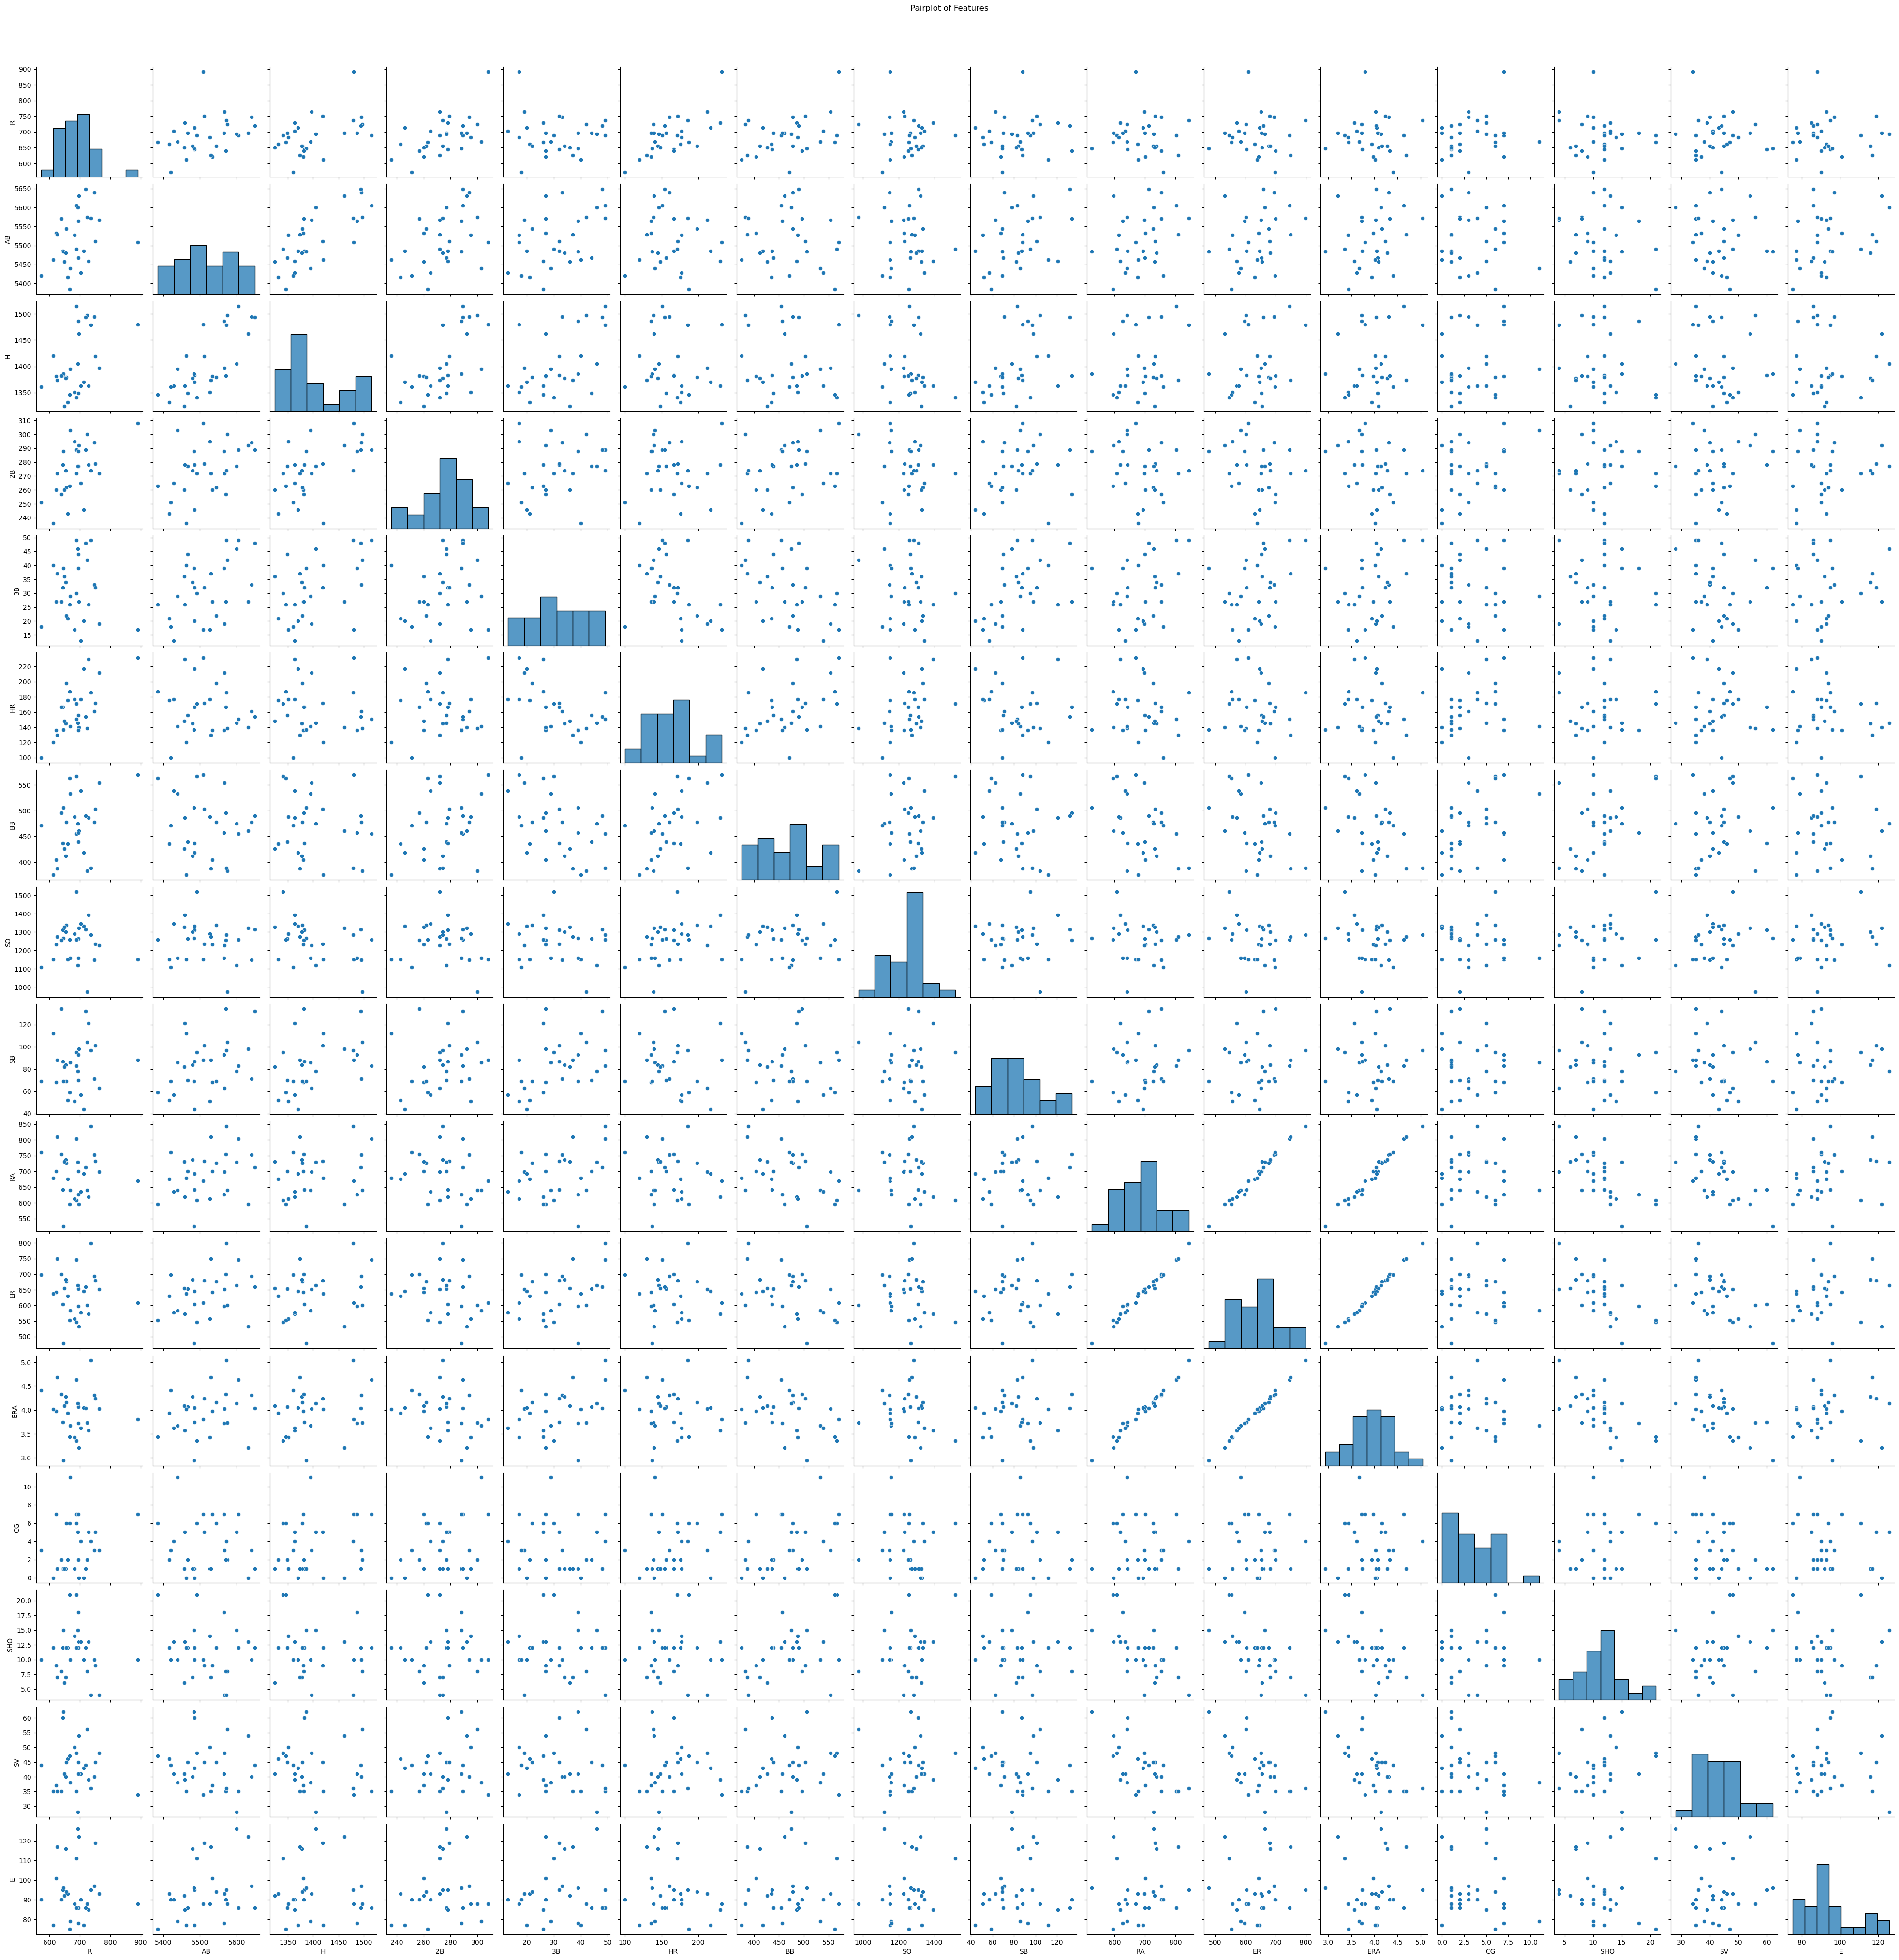

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Simple Pairplot
sns.pairplot(data[features])
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()


#### Correlation

In [24]:
data.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


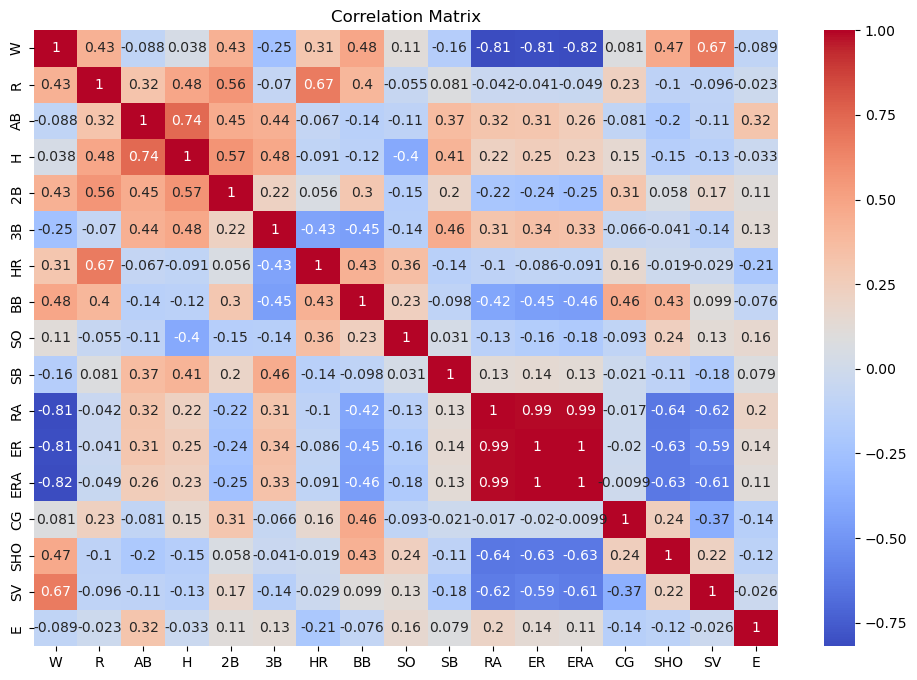

In [25]:
# Visualizing the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Preprocessing and Feature ingeneering

In [26]:
# Feature scaling
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.drop('W', axis=1))  # Scaling all features except the target variable
data_scaled_df = pd.DataFrame(data_scaled, columns=data.columns[:-1])
print("Scaled data:\n", data_scaled_df.head())
X = data_scaled_df
y = data['W']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Scaled data:
           W         R        AB         H        2B        3B        HR  \
0  0.619078  0.847731  1.663685  1.420173  1.041193 -0.787299 -1.534902   
1  0.134432 -0.711094 -0.970681  0.127403  1.235809 -0.243967 -0.536592   
2 -0.332906 -1.115233 -0.151891  1.588795 -0.223808 -0.723377  1.139144   
3 -1.146419  0.241522 -0.401088 -0.828122 -0.418423 -0.883181 -1.160536   
4  0.013270  1.280738  1.984081  0.801892  1.722347 -0.403770 -0.251360   

         BB        SO        SB        RA        ER       ERA        CG  \
0 -2.697630  0.913883 -0.666234 -0.505110 -0.506955 -0.539806 -0.814629   
1  0.154878 -0.601826  0.165971  0.248930  0.254598 -0.539806  0.172800   
2 -0.893982  0.111449 -0.680339 -0.751623 -0.641347  2.772641 -0.320914   
3 -0.168602 -0.690985  0.180076  0.103922  0.053010  1.300442 -0.567771   
4  0.105866 -0.022290  1.618803  1.597501  1.531318  1.300442  0.172800   

        SHO        SV  
0  1.671607 -0.461470  
1  0.249879 -0.607197  
2 -0.654856 

### Building The Models

#### Choosing the models

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor


In [30]:
# Define pipelines for each model
linear_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("linear", LinearRegression())
])

rf_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("rf", RandomForestRegressor(random_state=42))
])

xgb_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("xgb", XGBRegressor(random_state=42))
])

svr_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svr", SVR())
])

lasso_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("lasso", Lasso())
])


In [31]:
# Training all models
linear_pipeline.fit(X_train, y_train)
rf_pipeline.fit(X_train, y_train)
xgb_pipeline.fit(X_train, y_train)
svr_pipeline.fit(X_train, y_train)
lasso_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('lasso', Lasso())])

In [33]:
from sklearn.metrics import mean_squared_error, r2_score

def calculate_metrics(pipeline, X_test, y_test):

    # Predict
    y_pred = pipeline.predict(X_test)
    
    # Calculate MSE
    mse = mean_squared_error(y_test, y_pred)
    
    # Calculate R2
    r2 = r2_score(y_test, y_pred)
    
    return mse, r2


In [34]:
# Evaluating the performance of all models
linear_mse, linear_r2 = calculate_metrics(linear_pipeline, X_test, y_test)
rf_mse, rf_r2 = calculate_metrics(rf_pipeline, X_test, y_test)
xgb_mse, xgb_r2 = calculate_metrics(xgb_pipeline, X_test, y_test)
svr_mse, svr_r2 = calculate_metrics(svr_pipeline, X_test, y_test)
lasso_mse, lasso_r2 = calculate_metrics(lasso_pipeline, X_test, y_test)

In [35]:
# Printing performance metrics for all models
print("Model Performance Metrics:")
print("Linear Regression:")
print("Mean Squared Error (MSE):", linear_mse)
print("R-squared (R2) Score:", linear_r2)
print()

print("Random Forest Regression:")
print("Mean Squared Error (MSE):", rf_mse)
print("R-squared (R2) Score:", rf_r2)
print()

print("XGBoost Regression:")
print("Mean Squared Error (MSE):", xgb_mse)
print("R-squared (R2) Score:", xgb_r2)
print()

print("Support Vector Regression (SVR):")
print("Mean Squared Error (MSE):", svr_mse)
print("R-squared (R2) Score:", svr_r2)
print()

print("Lasso Regression:")
print("Mean Squared Error (MSE):", lasso_mse)
print("R-squared (R2) Score:", lasso_r2)
print()

Model Performance Metrics:
Linear Regression:
Mean Squared Error (MSE): 27.943032506667787
R-squared (R2) Score: 0.7876400316149377

Random Forest Regression:
Mean Squared Error (MSE): 52.0209166666667
R-squared (R2) Score: 0.6046542115262822

XGBoost Regression:
Mean Squared Error (MSE): 45.9266416564739
R-squared (R2) Score: 0.6509691577722059

Support Vector Regression (SVR):
Mean Squared Error (MSE): 120.15084793863117
R-squared (R2) Score: 0.08688399286664084

Lasso Regression:
Mean Squared Error (MSE): 32.39824410410747
R-squared (R2) Score: 0.7537815520903802



In [36]:
# Defining a dictionary to store the performance metrics of each model
model_metrics = {
    'Linear Regression': {'MSE': linear_mse, 'R2': linear_r2},
    'Random Forest Regression': {'MSE': rf_mse, 'R2': rf_r2},
    'XGBoost Regression': {'MSE': xgb_mse, 'R2': xgb_r2},
    'Support Vector Regression (SVR)': {'MSE': svr_mse, 'R2': svr_r2},
    'Lasso Regression': {'MSE': lasso_mse, 'R2': lasso_r2}
}

In [37]:
# Finding the model with the lowest MSE
best_model_mse = min(model_metrics, key=lambda x: model_metrics[x]['MSE'])
best_model_mse_mse = model_metrics[best_model_mse]['MSE']
best_model_mse_r2 = model_metrics[best_model_mse]['R2']

In [38]:
# Finding the model with the highest R2 score
best_model_r2 = max(model_metrics, key=lambda x: model_metrics[x]['R2'])
best_model_r2_mse = model_metrics[best_model_r2]['MSE']
best_model_r2_r2 = model_metrics[best_model_r2]['R2']

In [39]:
# Printing the best performing model based on MSE
print("Best performing model based on MSE:")
print("Model:", best_model_mse)
print("Mean Squared Error (MSE):", best_model_mse_mse)
print("R-squared (R2) Score:", best_model_mse_r2)
print()

Best performing model based on MSE:
Model: Linear Regression
Mean Squared Error (MSE): 27.943032506667787
R-squared (R2) Score: 0.7876400316149377



In [40]:
# Printing the best performing model based on R2 score
print("Best performing model based on R2 score:")
print("Model:", best_model_r2)
print("Mean Squared Error (MSE):", best_model_r2_mse)
print("R-squared (R2) Score:", best_model_r2_r2)

Best performing model based on R2 score:
Model: Linear Regression
Mean Squared Error (MSE): 27.943032506667787
R-squared (R2) Score: 0.7876400316149377


### Another Approach

#### removing the outliers

In [41]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


data = pd.read_csv("baseball.csv")


print(data.head())


X = data.drop('W', axis=1)
y = data['W']


    W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  SHO  \
0  95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2    8   
1  83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   12   
2  81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   10   
3  76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7    9   
4  74  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   12   

   SV    E  
0  56   88  
1  45   86  
2  38   79  
3  37  101  
4  35   86  


In [42]:
# Apply outlier removal function
def outlier_hunt(data):
    
    outlier_indices = []
    for col in data.columns.tolist():
        Q1 = np.percentile(data[col], 25)
        Q3 = np.percentile(data[col],75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_col = data[(data[col] < Q1 - outlier_step) | (data[col] > Q3 + outlier_step )].index
        outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )
    return multiple_outliers

outlier_indices = outlier_hunt(X)
X = X.drop(outlier_indices).reset_index(drop=True)
y = y.drop(outlier_indices).reset_index(drop=True)

In [43]:
# Apply MinMaxScaler to the dataset
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [44]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [45]:
# Displaying the shapes of training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (24, 16)
Shape of X_test: (6, 16)
Shape of y_train: (24,)
Shape of y_test: (6,)


In [46]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [47]:
# Defining the models
linear_model = LinearRegression()
lasso_model = Lasso()
rf_model = RandomForestRegressor(random_state=42)
xgb_model = XGBRegressor(random_state=42)
svr_model = SVR()

In [48]:
# Training the models
linear_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
svr_model.fit(X_train, y_train)

SVR()

In [49]:
# Evaluating the models
linear_score = linear_model.score(X_test, y_test)
lasso_score = lasso_model.score(X_test, y_test)
rf_score = rf_model.score(X_test, y_test)
xgb_score = xgb_model.score(X_test, y_test)
svr_score = svr_model.score(X_test, y_test)

In [50]:
# Printing the scores
print("Linear Regression Score:", linear_score)
print("Lasso Regression Score:", lasso_score)
print("Random Forest Regression Score:", rf_score)
print("XGBoost Regression Score:", xgb_score)
print("Support Vector Regression Score:", svr_score)

Linear Regression Score: 0.787640031614939
Lasso Regression Score: 0.449634378699733
Random Forest Regression Score: 0.6032923369221025
XGBoost Regression Score: 0.6509691577722059
Support Vector Regression Score: 0.08396739949710175


#### Choosing and displaying the best model

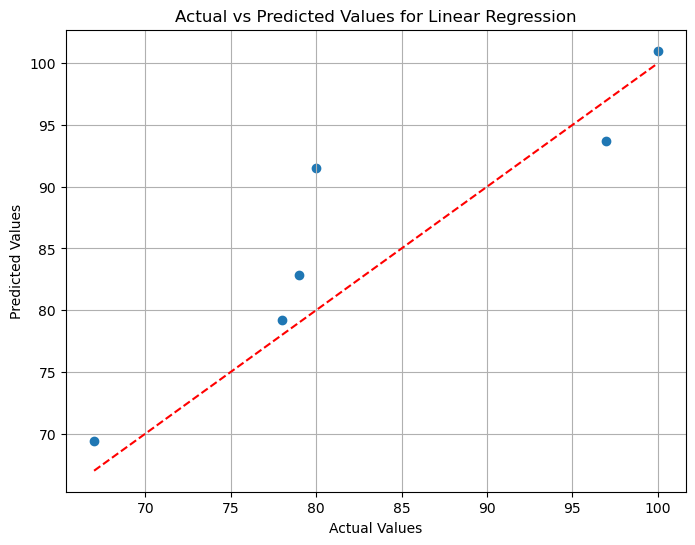

In [51]:
# Choosing the best model
best_model = max([linear_score, lasso_score, rf_score, xgb_score, svr_score])

# Plotting the predicted values versus the actual values for the best model
if best_model == linear_score:
    best_model_name = "Linear Regression"
    predicted_values = linear_model.predict(X_test)
elif best_model == lasso_score:
    best_model_name = "Lasso Regression"
    predicted_values = lasso_model.predict(X_test)
elif best_model == rf_score:
    best_model_name = "Random Forest Regression"
    predicted_values = rf_model.predict(X_test)
elif best_model == xgb_score:
    best_model_name = "XGBoost Regression"
    predicted_values = xgb_model.predict(X_test)
else:
    best_model_name = "Support Vector Regression"
    predicted_values = svr_model.predict(X_test)

# Plotting the predicted values versus the actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predicted_values)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Actual vs Predicted Values for {best_model_name}")
plt.grid(True)
plt.show()

### Saving the best Model

In [52]:
from joblib import dump
dump(best_model, 'best_model_baseball.joblib')
print("Best model saved successfully.")

Best model saved successfully.


### Choosing the best Model

I got the lowest MSE and the highest R2 score for Linear Regression.Which indicates superior predictive accuracy over all other.

### Findings

* R and H, R and 2B have a strong correlation
* RA,ER,ERA have strong -ve correlation with W
* teams with lower ERA and RA tend to score more runs and win more games, proving importance of pitching performance for success.
* The analysis of the correlation matrix indicates that there might be linear relationships between the variables,which provide interpretable coefficient